## depth detection

Docs example:

/mnt/d/coding/git/TomaszKaleczyc/huggingface_tryout/environment/___venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution2.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/mnt/d/coding/git/TomaszKaleczyc/huggingface_tryout/environment/___venv/lib/python3.8/site-packages/transformers/models/dpt/feature_extraction_dpt.py:28: FutureWarning: The class DPTFeatureExt

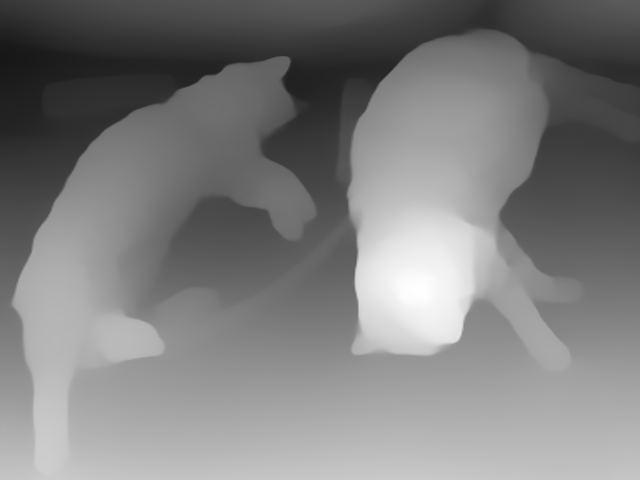

In [1]:
from transformers import pipeline

depth_estimator = pipeline(task="depth-estimation", model="Intel/dpt-large")
output = depth_estimator("http://images.cocodataset.org/val2017/000000039769.jpg")

# This is a tensor with the values being the depth expressed
# in meters for each pixel
output["depth"]

Custom examples:

/mnt/d/coding/git/TomaszKaleczyc/huggingface_tryout/environment/___venv/lib/python3.8/site-packages/torch/nn/functional.py:3631: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(


poles.jpg


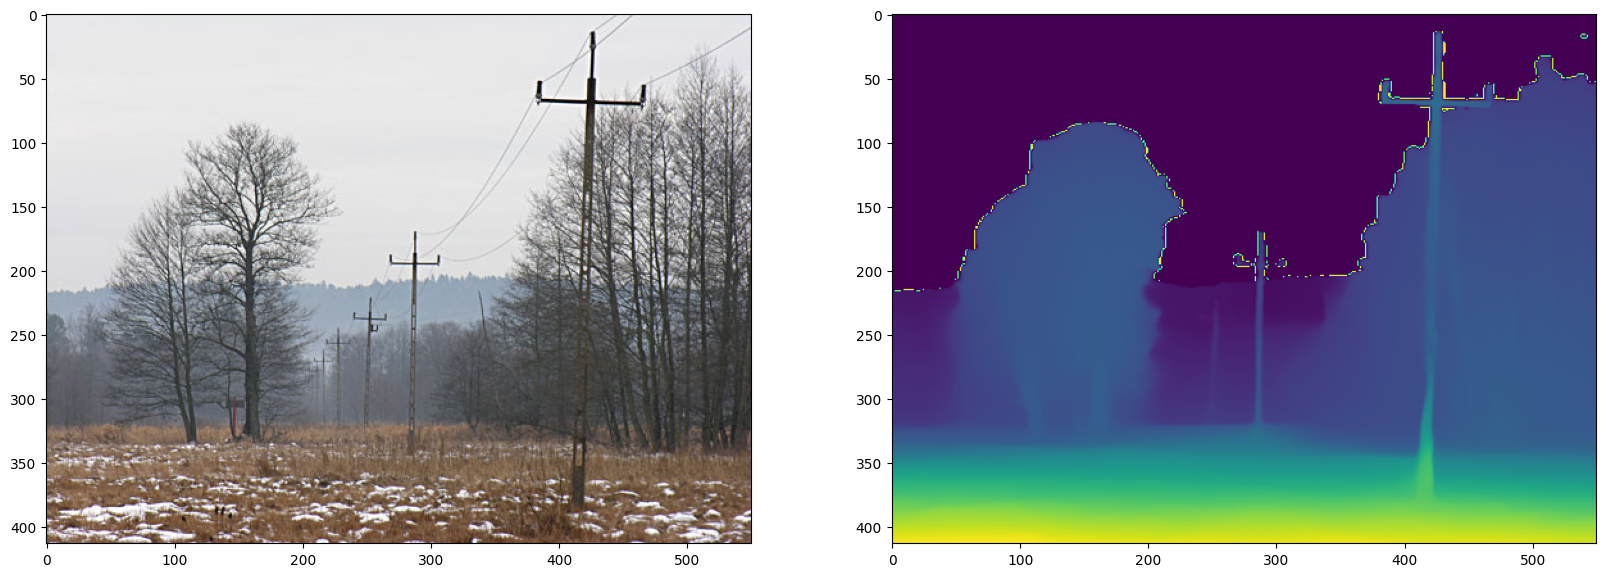

poles2.jpg


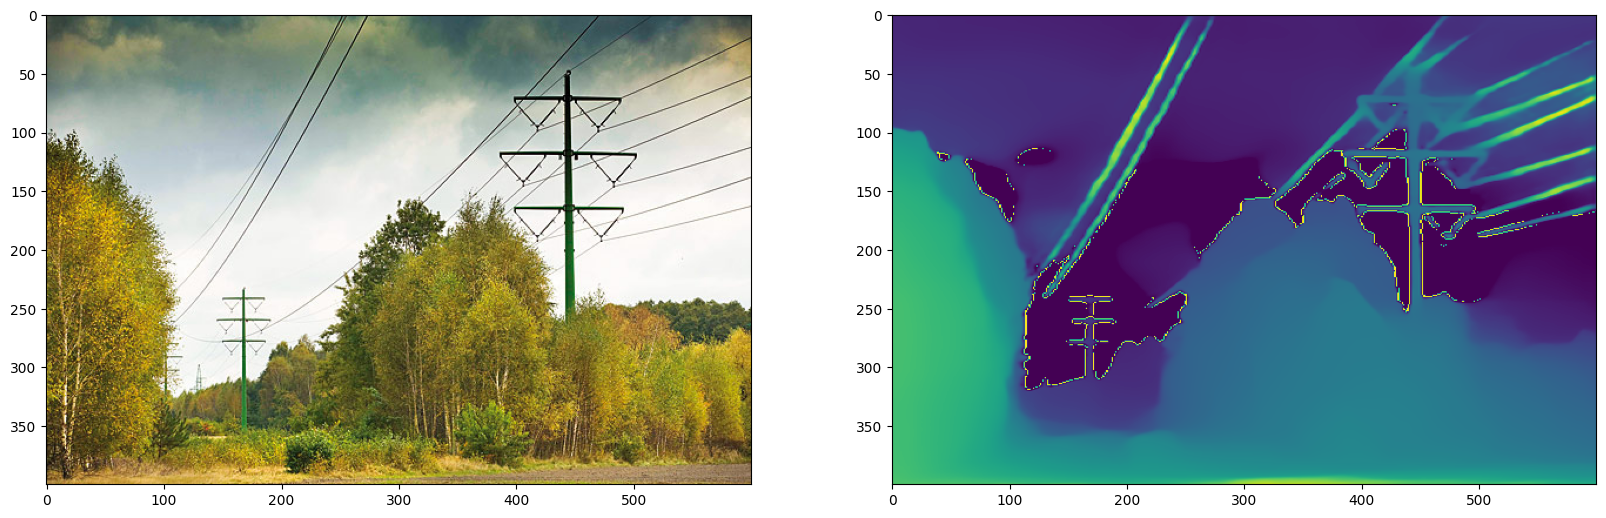

poles3.jpg


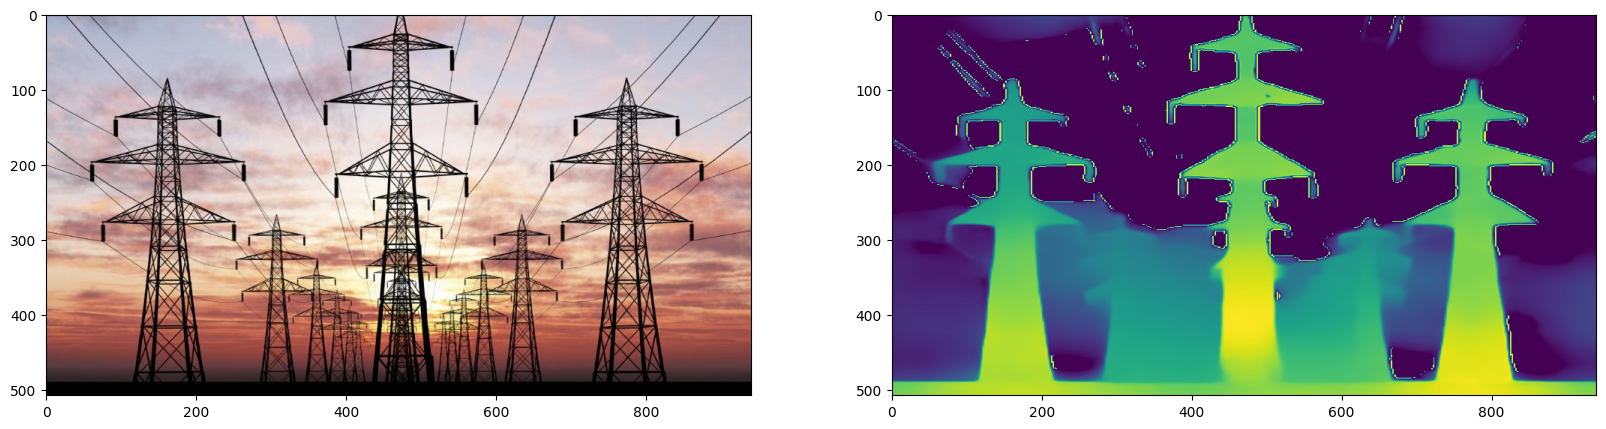

In [14]:
from pathlib import Path, PosixPath
from typing import Tuple
from IPython.display import display

from matplotlib import pyplot as plt


def compare_image_with_depth_map(image_path: PosixPath, figsize: Tuple[int, int] = (20, 10)) -> None:
    print("="*60)
    print(image_path)
    img = plt.imread(image_path)
    depth_map = depth_estimator(str(image_path))
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    axs[0].imshow(img)
    axs[1].imshow(depth_map['depth'])
    plt.show()


image_dir = Path('../test_images')

for image_path in image_dir.iterdir():
    compare_image_with_depth_map(image_path)


In [19]:
predicted_depth = output["predicted_depth"]
predicted_depth.max(), predicted_depth

(tensor(18.2176),
 tensor([[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          ...,
          [14.1803, 14.2725, 14.3583,  ..., 14.7565, 14.8278, 14.7412],
          [14.1944, 14.2890, 14.4258,  ..., 14.8630, 14.8520, 14.7659],
          [14.2589, 14.3828, 14.4851,  ..., 15.0092, 14.9810, 14.7640]]]))